In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
import cv2
from PIL import Image
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
Height = 120
Width = 120

In [3]:
training_directory = "Face Mask Dataset/train"
testing_directory = "Face Mask Dataset/test"
validation_directory = "Face Mask Dataset/Validation"

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# imagedatagenerator - Generates batches of tensor image data with real-time data augmentation

train_data_gen = ImageDataGenerator(rescale=1./255,
                                         zoom_range=0.2,
                                         shear_range=0.2,
                                         rotation_range=0.2)

test_data_gen = ImageDataGenerator(rescale=1./255)

validation_data_gen = ImageDataGenerator(rescale=1./255,
                                         zoom_range=0.2,
                                         shear_range=0.2)

In [8]:
train_gen = train_data_gen.flow_from_directory(
        training_directory,
        target_size=(Height,Width),
        batch_size=77,
        interpolation="nearest",
        class_mode='binary',
        classes=["WithMask","WithoutMask"])

Found 10000 images belonging to 2 classes.


In [9]:
test_gen = test_data_generator.flow_from_directory(
        testing_directory,
        target_size=(Height,Width),
        batch_size=66,
        interpolation="nearest",
        class_mode='binary',
        classes=["WithMask","WithoutMask"])

Found 992 images belonging to 2 classes.


In [10]:
validation_gen = validation_data_generator.flow_from_directory(
        validation_directory,
        target_size=(Height,Width),
        batch_size=80,
        interpolation="nearest",
        class_mode='binary',
        classes=["WithoutMask","WithMask"])

Found 800 images belonging to 2 classes.


In [11]:
withWithoutMask = {"0":"Without Mask","1":"With Mask"}

In [12]:
def toArray(generator):
    list_1 = []
    list_2 = []
    for i in range(generator.__len__()):
        next_temp = gen.next()
        list_1.append(next_temp[0])
        list_2.append(next_temp[1])
    x=np.concatenate(list_1)
    y=np.concatenate(list_2)
    return (x,y)

In [23]:
len(train_generator.next()[0])

77

In [14]:
x_train, y_train = toArray(train_gen)

In [15]:
x_test, y_test = toArray(test_gen)

In [16]:
x_val,y_val = toArray(validation_gen)

In [17]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape,y_val.shape)

(10000, 120, 120, 3) (10000,)
(992, 120, 120, 3) (992,)
(800, 120, 120, 3) (800,)


In [24]:
#build model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input, Activation, Dense, Flatten
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import plot_model
from keras.losses import binary_crossentropy


In [25]:
def model_build():
        model = Sequential()
        
        model.add(Input(shape=(HEIGHT,WEIGHT,3,)))

        model.add(Conv2D(filters=16,kernel_size=(2,2),padding="same"))
        model.add(Activation("relu"))
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(4,4)))

        model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same"))
        model.add(Activation("relu"))
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(4,4),strides=(4,4)))
               
        model.add(Flatten())
        
        model.add(Dense(2048))
        model.add(Activation("relu"))
        model.add(Dropout(0.25))
        
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(Dropout(0.2))
        
        model.add(Dense(1))
        model.add(Activation("sigmoid"))
        
        optimizer = Adam(lr=0.001)
        model.compile(optimizer = optimizer ,metrics=["accuracy"], loss = binary_crossentropy)
        
        return model

In [26]:
model = model_build()
plot_model(model,show_shapes=True,show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [27]:
reducer = ReduceLROnPlateau(monitor='loss',patience=3,factor=0.75,min_lr=0.000001,verbose=1)
stopSign = EarlyStopping(monitor = "loss",patience=20,min_delta=0.000000000001,mode="min")

epochs = 100
batch_size = 40
steps_per_epoch = x_train.shape[0] // batch_size
history = model.fit(x_train,y_train,
                    epochs = epochs, 
                    validation_data = (x_val,y_val),
                    verbose = 1,
                    batch_size=batch_size,
                    steps_per_epoch = steps_per_epoch,
                    callbacks=[reducer,stopSign])

Epoch 1/100
250/250 [==============================] - 70s 281ms/step - loss: 0.1915 - accuracy: 0.9187 - val_loss: 6.2431 - val_accuracy: 0.0200
Epoch 2/100
250/250 [==============================] - 75s 301ms/step - loss: 0.0860 - accuracy: 0.9688 - val_loss: 7.2568 - val_accuracy: 0.0113
Epoch 3/100
250/250 [==============================] - 75s 300ms/step - loss: 0.0670 - accuracy: 0.9767 - val_loss: 9.9784 - val_accuracy: 0.0150
Epoch 4/100
250/250 [==============================] - 68s 272ms/step - loss: 0.0624 - accuracy: 0.9772 - val_loss: 6.7863 - val_accuracy: 0.0113
Epoch 5/100
250/250 [==============================] - 61s 245ms/step - loss: 0.0495 - accuracy: 0.9820 - val_loss: 9.7080 - val_accuracy: 0.0088
Epoch 6/100
250/250 [==============================] - 66s 264ms/step - loss: 0.0457 - accuracy: 0.9836 - val_loss: 8.7860 - val_accuracy: 0.0063
Epoch 7/100
250/250 [==============================] - 60s 238ms/step - loss: 0.0421 - accuracy: 0.9858 - val_loss: 8.9728 -

Epoch 50/100
250/250 [==============================] - 77s 310ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 24.8060 - val_accuracy: 0.0037
Epoch 51/100
250/250 [==============================] - 65s 259ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 23.2985 - val_accuracy: 0.0025
Epoch 52/100
250/250 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9988
Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.0001334838816546835.
250/250 [==============================] - 61s 246ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 24.6914 - val_accuracy: 0.0037
Epoch 53/100
250/250 [==============================] - 58s 231ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 24.9349 - val_accuracy: 0.0050
Epoch 54/100
250/250 [==============================] - 63s 252ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 23.9406 - val_accuracy: 0.0025
Epoch 55/100
250/250 [==============================] - 58s 230ms/step - loss: 0.0054 - accurac

Epoch 95/100
250/250 [==============================] - 1165s 5s/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 26.8965 - val_accuracy: 0.0037
Epoch 96/100
250/250 [==============================] - 101s 403ms/step - loss: 7.0817e-04 - accuracy: 0.9997 - val_loss: 26.8990 - val_accuracy: 0.0037
Epoch 97/100
250/250 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9995
Epoch 00097: ReduceLROnPlateau reducing learning rate to 7.516946425312199e-06.
250/250 [==============================] - 94s 378ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 26.9898 - val_accuracy: 0.0037
Epoch 98/100
250/250 [==============================] - 72s 288ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 26.9813 - val_accuracy: 0.0037
Epoch 99/100
250/250 [==============================] - 88s 351ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 26.9774 - val_accuracy: 0.0037
Epoch 100/100
250/250 [==============================] - ETA: 0s - loss: 0.0010 - accuracy:

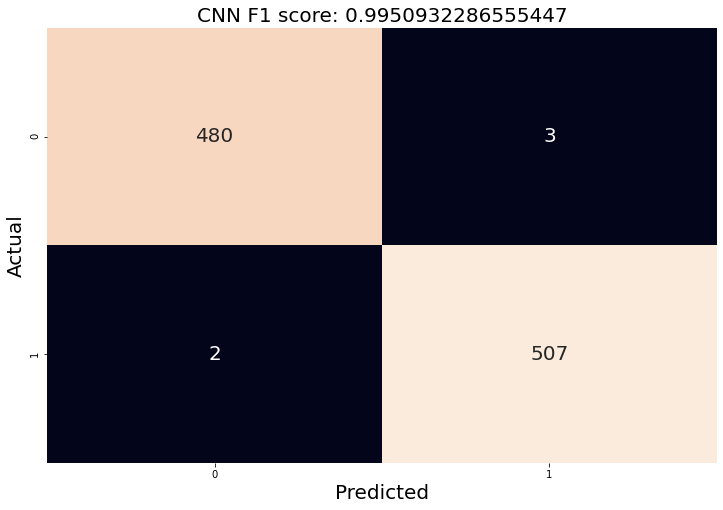

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

ypred = model.predict_classes(x_test)
plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})
plt.title(f"CNN F1 score: {f1_score(ypred,y_test)}",fontsize=20)
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.show()


KeyError: '1.0'

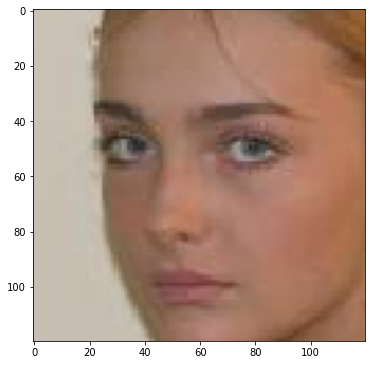

In [53]:
plt.figure(figsize=(50,50))
tempc = np.random.choice(x_test[y_test == ypred.ravel()].shape[0],35,replace=False)
d = 0
for i in tempc:
    plt.subplot(7, 5, d+1)
    d += 1
    tempc = np.random.randint(x_test[y_test == ypred.ravel()].shape[0])
    plt.imshow(x_test[y_test == ypred.ravel()][tempc])
    plt.title(f"True:{withWithoutMask[str(y_test[y_test == ypred.ravel()][tempc])]}\nPredicted:{withWithoutMask[str(ypred.ravel()[y_test == ypred.ravel()][tempc])]}",
             fontsize=40)
    plt.axis("off")
plt.subplots_adjust(wspace=-0.1, hspace=0.3)
plt.show()

KeyError: '1.0'

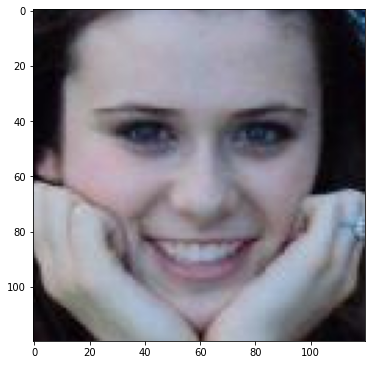

In [54]:
plt.figure(figsize=(50,50))
tempc = np.random.choice(x_test[y_test != ypred.ravel()].shape[0],35,replace=True)

d = 0
for i in tempc:
    plt.subplot(7, 5, d+1)
    d += 1
    tempc = np.random.randint(x_test[y_test != ypred.ravel()].shape[0])
    plt.imshow(x_test[y_test != ypred.ravel()][tempc])
    plt.title(f"True:{withWithoutMask[str(y_test[y_test != ypred.ravel()][tempc])]}\nPredicted:{withWithoutMask[str(ypred.ravel()[y_test != ypred.ravel()][tempc])]}",
            fontsize=40)
    plt.axis("off")
plt.subplots_adjust(wspace=-0.1, hspace=0.3)
plt.show()

In [55]:
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = True)

In [56]:
B.shape

(4, 1)